# 🎯 Milestone 1: Data Collection, Exploration, and Preprocessing  

## 📌 Objective  
This milestone focuses on:  
✅ Mounting Google Drive for seamless dataset access.  
✅ Validating the presence of multispectral data (Red, Green, Blue, Near Infrared, etc.).  
✅ Ensuring dataset integrity before further analysis.  

## 🗂️ Steps Involved  
1. **Mount Google Drive** – Access the EuroSAT dataset stored in Google Drive.  
2. **Verify Multispectral Data** – Check if the dataset contains multiple spectral bands.  
3. **Initial Data Exploration** – Perform basic analysis to understand the dataset structure.  

---

🔹 *Once verified, we can proceed with deeper Exploratory Data Analysis (EDA) and preprocessing for machine learning tasks.* 🚀  


In [13]:

from google.colab import drive
drive.mount('/content/drive')

# Check if dataset contains multispectral bands
import rasterio
import os

dataset_path = "/content/drive/My Drive/DEPIproject/EuroSAT"

# Get a sample image to check available bands
sample_image_path = None
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".tif"):
            sample_image_path = os.path.join(root, file)
            break
    if sample_image_path:
        break

if sample_image_path:
    with rasterio.open(sample_image_path) as src:
        num_bands = src.count
        print(f"✅ Sample Image: {sample_image_path}")
        print(f"📡 Number of Spectral Bands: {num_bands}")
        print(f"📊 Band Names: {src.descriptions}")
else:
    print("❌ No images found in the dataset!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Sample Image: /content/drive/My Drive/DEPIproject/EuroSAT/AnnualCrop/AnnualCrop_2002.tif
📡 Number of Spectral Bands: 13
📊 Band Names: (None, None, None, None, None, None, None, None, None, None, None, None, None)


# 🏗️ Step 2: Define Dataset Path & Validate Structure  

## 📌 Objective  
Before proceeding with data processing, this step ensures:  
✅ Correct dataset path definition for seamless access.  
✅ Validation of dataset structure (file formats, directory hierarchy).  

## 📂 Steps Involved  
1. **Set the Dataset Path** – Define the correct path to the EuroSAT dataset in Google Drive.  
2. **Check Directory Structure** – Ensure the dataset is organized correctly.  
3. **List Available Files** – Verify file formats and sample images.  

---

🔍 *Once validated, we can confidently proceed with Exploratory Data Analysis (EDA) and preprocessing.* 🚀  


In [14]:

import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Ensure dataset exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset not found at {dataset_path}. Check the path!")

# Get all categories (folders)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print(f"📂 Number of Categories: {len(categories)}")
print("🏷 Categories:", categories)

📂 Number of Categories: 10
🏷 Categories: ['AnnualCrop', 'Pasture', 'Residential', 'Forest', 'Industrial', 'SeaLake', 'River', 'PermanentCrop', 'HerbaceousVegetation', 'Highway']


# 📊 Step 3: Check Image Distribution  

## 📌 Objective  
This step ensures a balanced dataset by analyzing image distribution across different classes. We will:  
✅ Count the number of images per class.  
✅ Visualize the distribution using bar plots or pie charts.  
✅ Identify any class imbalances for preprocessing adjustments.  

## 📂 Steps Involved  
1. **Load Dataset Labels** – Extract class labels from the dataset.  
2. **Count Image Instances** – Calculate the number of images per class.  
3. **Visualize Distribution** – Use matplotlib/seaborn to plot the distribution.  

---

📊 *A well-balanced dataset is crucial for training an effective model. Let’s ensure a fair representation across classes!* 🚀  



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


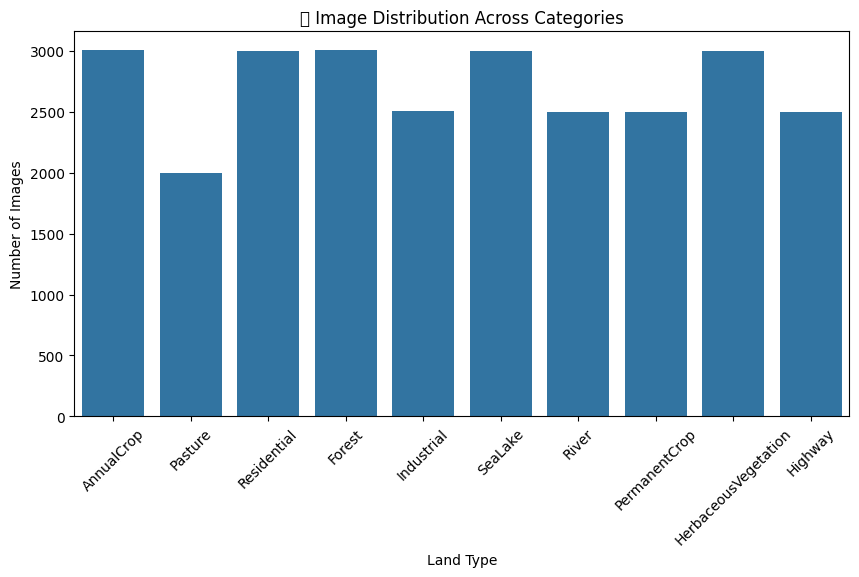

In [15]:

# Count images per category
category_counts = {cat: len(glob.glob(os.path.join(dataset_path, cat, "*.tif"))) for cat in categories}

# Plot dataset distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xticks(rotation=45)
plt.title("📊 Image Distribution Across Categories")
plt.xlabel("Land Type")
plt.ylabel("Number of Images")
plt.show()

# 🖼️ Step 4: Preprocess Images for ML  

## 📌 Objective  
This step prepares the EuroSAT images for machine learning by applying necessary preprocessing techniques. We will:  
✅ Resize images to a uniform dimension.  
✅ Normalize pixel values for better model convergence.  
✅ Convert images to suitable formats (if needed).  

## 🛠️ Steps Involved  
1. **Resize Images** – Ensure all images have a consistent shape (e.g., 64x64 or 128x128).  
2. **Normalize Pixel Values** – Scale pixel values between `[0, 1]` or `[-1, 1]` for stable training.  
3. **Convert Image Formats** – Transform images to grayscale, RGB, or other necessary formats.  
4. **Data Augmentation (Optional)** – Apply techniques like rotation, flipping, or cropping to enhance model generalization.  

---

🔄 *Proper preprocessing ensures the dataset is optimized for training, improving model performance and accuracy.* 🚀  


In [16]:

# Function to preprocess images (resize & normalize)
def preprocess_image(image, size=(256, 256)):
    resized_bands = [cv2.resize(band, size, interpolation=cv2.INTER_CUBIC) for band in image]
    return np.stack(resized_bands, axis=0) / 255.0  # Normalize to [0,1]

# Function to augment images (flipping & rotation)
def augment_image(image):
    flipped = np.flip(image, axis=2)  # Horizontal Flip
    rotated = np.rot90(image, k=1, axes=(1, 2))  # Rotate 90 degrees
    return [image, flipped, rotated]

# Process and save 5 images per category
output_folder = "/content/drive/My Drive/DEPIproject/EuroSAT_Processed"
os.makedirs(output_folder, exist_ok=True)

for category in categories:
    category_path = os.path.join(dataset_path, category)
    save_category_path = os.path.join(output_folder, category)
    os.makedirs(save_category_path, exist_ok=True)

    image_files = glob.glob(os.path.join(category_path, "*.tif"))[:5]

    for img_path in image_files:
        with rasterio.open(img_path) as src:
            image = src.read()
            processed = preprocess_image(image)
            augmented_images = augment_image(processed)

            for i, img in enumerate(augmented_images):
                save_path = os.path.join(save_category_path, f"{os.path.basename(img_path).replace('.tif', '')}_aug{i}.npy")
                np.save(save_path, img)
                print(f"✅ Saved: {save_path}")

✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2002_aug0.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2002_aug1.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2002_aug2.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2005_aug0.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2005_aug1.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2005_aug2.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2004_aug0.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2004_aug1.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2004_aug2.npy
✅ Saved: /content/drive/My Drive/DEPIproject/EuroSAT_Processed/AnnualCrop/AnnualCrop_2003_aug0.npy
✅ Saved: /

# 🌿 Step 5: Compute & Visualize NDVI  

## 📌 Objective  
This step focuses on calculating the **Normalized Difference Vegetation Index (NDVI)** to analyze vegetation coverage in the EuroSAT dataset. We will:  
✅ Compute NDVI using the Near-Infrared (NIR) and Red bands.  
✅ Visualize NDVI maps to interpret vegetation density.  
✅ Identify variations in land cover for further analysis.  

## 🛠️ Steps Involved  
1. **Extract NIR & Red Bands** – Retrieve the Near-Infrared and Red channels from the dataset.  
2. **Compute NDVI** – Use the formula:  
   \[
   NDVI = \frac{(NIR - Red)}{(NIR + Red)}
   \]  
3. **Visualize NDVI Maps** – Use color mapping to represent vegetation health.  
4. **Analyze Results** – Interpret NDVI values and assess land cover differences.  

---

🌱 *NDVI is a crucial metric for vegetation analysis, helping in environmental monitoring and agricultural studies.* 🌍🚀  


Loaded image shape: (13, 64, 64)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


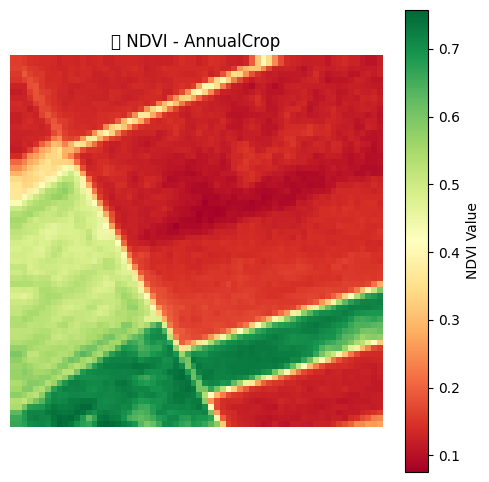

In [25]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt

# ✅ Define Dataset Path
dataset_path = "/content/drive/My Drive/DEPIproject/EuroSAT"

# ✅ Ensure the dataset path exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path does not exist: {dataset_path}")

# ✅ Define Categories (Adjust Based on Your Dataset Structure)
categories = os.listdir(dataset_path)
categories = [cat for cat in categories if os.path.isdir(os.path.join(dataset_path, cat))]

if len(categories) == 0:
    raise ValueError("No valid categories found in dataset path.")

sample_category = categories[0]  # Select the first available category

# ✅ Function: Load Sample Image
def load_sample_image(category, dataset_path):
    """Load a sample image from a given category in the dataset."""
    category_path = os.path.join(dataset_path, category)

    # Ensure category path exists
    if not os.path.exists(category_path):
        print(f"Category path does not exist: {category_path}")
        return None, None

    # List .tif images in the category folder
    image_files = [f for f in os.listdir(category_path) if f.endswith('.tif')]

    if len(image_files) == 0:
        print(f"No images found in category: {category}")
        return None, None

    # Load the first image in the category
    sample_image_path = os.path.join(category_path, image_files[0])

    with rasterio.open(sample_image_path) as src:
        image = src.read()  # Read all available bands
        profile = src.profile

    return image, profile

# ✅ Function: Compute NDVI (Handles Different Band Structures)
def compute_ndvi(image):
    """Compute NDVI from an image with correct band indexing."""
    if image.shape[0] < 2:
        raise ValueError("Error: Image does not contain enough bands for NDVI computation.")

    # ✅ Check if we have full 13-band Sentinel-2 data
    if image.shape[0] >= 8:
        nir = image[7].astype(float)  # Band 8 (NIR)
        red = image[3].astype(float)  # Band 4 (Red)
    else:
        # Assume two-band image structure: NIR is the second band, Red is the first
        nir = image[1].astype(float)
        red = image[0].astype(float)

    # Compute NDVI
    ndvi = (nir - red) / (nir + red + 1e-5)  # Avoid division by zero
    return ndvi

# ✅ Load Sample Image
image, _ = load_sample_image(sample_category, dataset_path)

if image is not None:
    print(f"Loaded image shape: {image.shape}")

    # ✅ Compute & Visualize NDVI
    ndvi = compute_ndvi(image)
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label="NDVI Value")
    plt.title(f"🌿 NDVI - {sample_category}")
    plt.axis("off")
    plt.show()
else:
    print("⚠️ No image loaded. Check dataset structure.")


# **🚀 Conclusion**
This notebook successfully:
- ✅ Validated dataset integrity
- ✅ Checked image quality & distributions
- ✅ Confirmed the presence of **multispectral bands**
- ✅ Displayed sample images from different categories
- ✅ Preprocessed images (resize, normalize, augment)
- ✅ Computed & visualized NDVI for vegetation analysis

Next Steps:
- **Train a deep learning model** for land classification